In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from importlib import reload
import structured_mesh as msh


1.0000000591389835


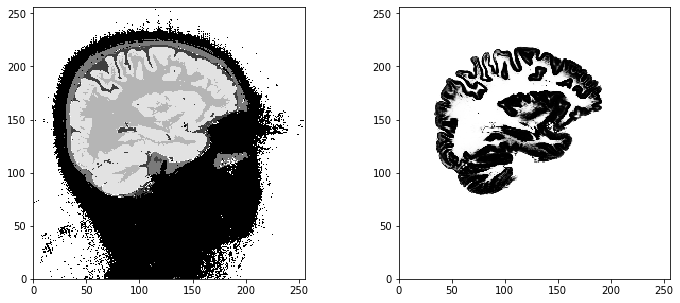

In [107]:
fig, axis = plt.subplots(1,2, figsize=(12,5))

tissue_prob_map = loadmat('/home/anne/Masterarbeit/masterarbeit/2d//data/T1SliceAnne.mat')
#print(tissue_prob_map)

gray_prob = tissue_prob_map['T1Slice']['gray'][0][0]
white_prob = tissue_prob_map['T1Slice']['white'][0][0]
skull_prob = tissue_prob_map['T1Slice']['skull'][0][0]
csf_prob = tissue_prob_map['T1Slice']['csf'][0][0]
scalp_prob = tissue_prob_map['T1Slice']['scalp'][0][0]

x = np.linspace(0, 1, 256)
y = np.linspace(0, 1, 256)
z = np.ndarray((256,256))
zz = np.ndarray((256,256))
g = np.ndarray((256,256))

for i in range(256):
    for j in range(256):
        probs = [gray_prob[i,j],white_prob[i,j],skull_prob[i,j],csf_prob[i,j],scalp_prob[i,j]]
        g[j,i] = gray_prob[i,j]
        if gray_prob[i,j]>0.5: 
            z[j,i]=1
        elif white_prob[i,j]>0.5: 
            z[j,i]=2
        elif skull_prob[i,j]>0.5: 
            z[j,i]=3
        elif csf_prob[i,j]>0.5: 
            z[j,i]=4
        elif scalp_prob[i,j]>0.5: 
            z[j,i]=5
        else:
            z[j,i]=0

set = axis[0].pcolor(z, cmap='Greys')
set = axis[1].pcolor(g, cmap='Greys')
axis[0].set_aspect(1)
axis[1].set_aspect(1)

print(g[82,80])
plt.show()


In [99]:
import structured_mesh 
reload(structured_mesh)

center = [128, 128]
center = np.array(center)

path = "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_16.npz"
mesh = structured_mesh.StructuredMesh(16)

theta = (150,50)
c = mesh.find_next_center(theta)
tissue_prob = mesh.gray_probs[int(c[0]+mesh.cells_per_dim*c[1])]
print(tissue_prob)


Created new mesh with 
 289 nodes 
 256 elements

0.26953126593980414


[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


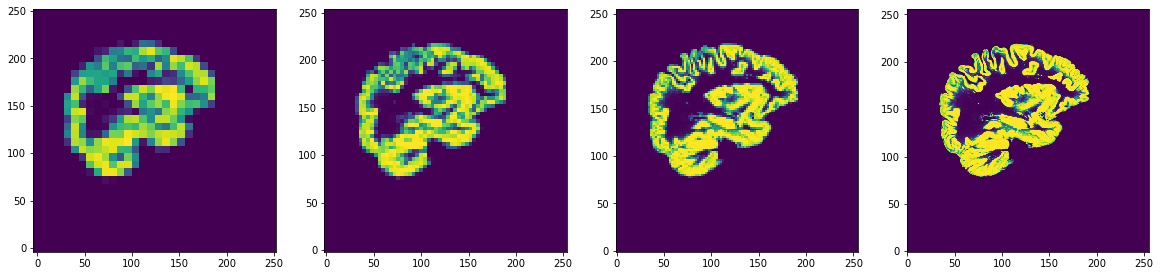

In [123]:
from os import name

fig, axis = plt.subplots(1,4, figsize=(20,5))

paths = [
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_32.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_64.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_128.npz",
    "/home/anne/Masterarbeit/masterarbeit/2d/data/mesh_hex_256.npz"]
numbers = [32,64,128,256]

point = [80,80]
for i in range(4):
    n = numbers[i]

    mesh = np.load(paths[i])

    elements = mesh['elements']
    nodes = mesh['nodes']
    labels = mesh['labels']
    gray_probs = mesh['gray_probs']
    print(gray_probs)
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.ndarray((n,n),float)
    g = np.ndarray((n,n),float)

    x = nodes[:n,0]
    y = nodes[:n,0]

    for k in range(n):
        for j in range(n):
            z[k,j] = labels[k+n*j]
            g[k,j] = gray_probs[k+n*j]

    axis[i].pcolormesh(x,y,g)
    axis[i].set_aspect(1)

plt.show()



Created new mesh with 
 1089 nodes 
 1024 elements

[11. 10.]
0.7259191605771775

Created new mesh with 
 4225 nodes 
 4096 elements

[21. 20.]
0.9926471175276674

Created new mesh with 
 16641 nodes 
 16384 elements

[43. 40.]
0.9813726070569828

Created new mesh with 
 66049 nodes 
 65536 elements

[85. 80.]
1.0000000591389835


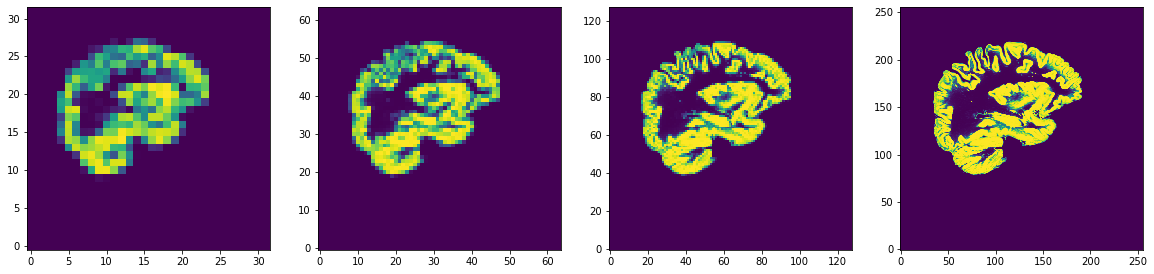

In [129]:
from os import name

fig, axis = plt.subplots(1,4, figsize=(20,5))

numbers = [32,64,128,256]

point = [85,80]
for i in range(4):
    n = numbers[i]

    mesh = msh.StructuredMesh(n)
    
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    z = np.ndarray((n,n),float)
    g = np.ndarray((n,n),float)

    x = mesh.nodes[:n,0]
    y = mesh.nodes[:n,0]

    for k in range(n):
        for j in range(n):
            z[k,j] = mesh.labels[k+n*j]
            g[k,j] = mesh.gray_probs[k+n*j]

    axis[i].pcolormesh(x,y,g)
    axis[i].set_aspect(1)

    c = mesh.find_next_center(point)
    print(c)
    print(g[int(c[0]),int(c[1])])



plt.show()